#### ----- 노트 -----
##### df type
- df에 여러 컬럼 받아오는 경우 : 2차원
- df에 한 컬럼만 받아오는 경우 : 1차원 == 시리즈

---
---

##### Step3-3 데이터 분석과 시각화 
###### 소개
데이터를 분석한 결과를 누구나 쉽게 이해할 수 있도록 시각적으로 표현하는 것도 매우 중요한데요. 이때 그래프를 사용하면 데이터에 있는 패턴을 효과적으로 표현할 수 있습니다. 스타벅스 음료 칼로리 정보, 실리콘 밸리 직업 데이터, 국가별 경제 성장 데이터 등 다양한 데이터를 직접 분석해 보면서 간단한 코드 몇 줄로 예쁜 그래프를 그리는 방법을 배워 보세요!

### 01. 시각화의 두가지 목적
#### 목적 (1) : 분석에 도움을 준다. 
- 일반적인 표로는 뭔가를 알아내기 어려움 
- 그래프로 보면 "패턴"이 보인다.
    - ex) Outlier(이상점) 같은 걸 찾을 수 있음

#### 목적 (2) : 리포팅을 도와줌
- 다른 팀에게 보고하는 경우, 단순히 숫자만 보여주기 보다 그래프로 시각화해주면 기획에 활용하기 용이하다.
- 데이터에 집중력을 높여준다. 

---
각 그래프의 특징을 이해하고, 상황에 맞게 이용할 수 있어야 한다.

### 02. 선 그래프
- 상황
    - 어떤 변화를 보여주기 적합
- 포인트 
    - x, y축의 그래프를 머리에 그리자!
- 주의
    - 선 그래프는 수치 데이터에 대해서 그릴 수 있음
    - if, 문자열 등의 데이터에 대해서는 그리기 어려운 점 주의.

#### 코드
- %matplotlib inline
- df.plot()
    - 선그래프 그리고 싶을 때 : .plot(kind = 'line')
    - 한 컬럼만 그리고 싶을 때 : .plot(y = '컬럼1')
    - 여러 컬럼 " : .plot(y=[컬럼 리스트])
- df['컬럼'].plot() 
    - 특정 컬럼을 지정해서도 .plot() 가능
    - df[['컬럼', '컬럼']].plot() 

In [2]:
# 시각화에 꼭 필요함.
%matplotlib inline 

import pandas as pd

In [3]:
# 데이터 받아오기
df = pd.read_csv('data/broadcast.csv', index_col = 0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


<AxesSubplot:>

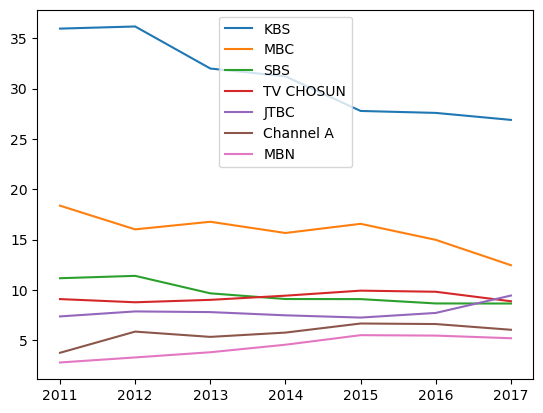

In [4]:
df.plot()

<AxesSubplot:>

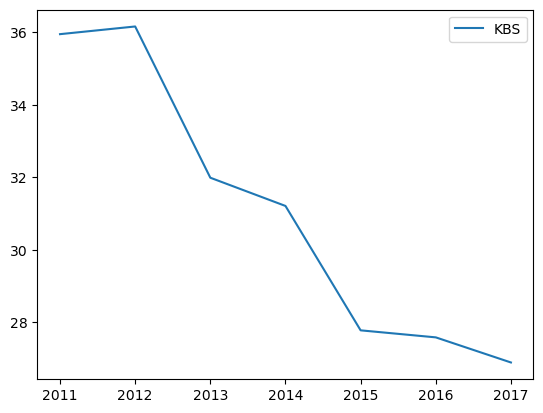

In [6]:
# y파라미터 사용해서 컬럼 지정하기 
df.plot(y='KBS')

<AxesSubplot:>

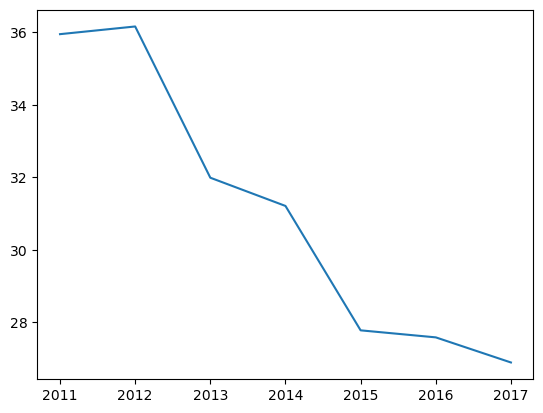

In [5]:
# df에 직접 컬럼 지정해서 그래프 그리기
df['KBS'].plot()

### 05. 막대그래프
- 선그래프 (.plot()) 보다 막대그래프(.plot(kind='bar'))가 더 적합한 경우
- 막대그래프 다루기
    - 가로로 눕히기 : .plot(kind='barh')
    - 값들을 위로 쌓기 : .plot(kind = 'bar', stacked = True)
        - 토탈값으로 비교하기 용이함
    - 하나의 값만 나타내기 : 판다스 시리즈 : df['원하는 컬럼'].plot(kind = 'bar')

In [4]:
# 대한민국 남,녀 운동 선호도

# 데이터 프레임으로 불러오기 
df = pd.read_csv('data/sports.csv', index_col = 0)
df

,Male,Female
Swimming,103,178
Baseball,363,289
Basketball,151,97
Golf,154,232
Soccer,413,109
Bowling,88,129


<AxesSubplot:>

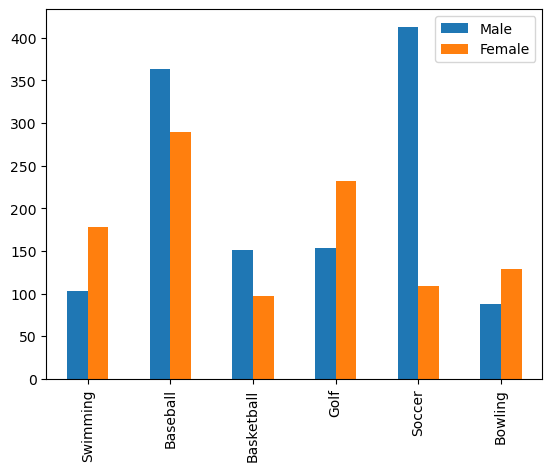

In [5]:
# 막대그래프로 나타내기
df.plot(kind = 'bar')

<AxesSubplot:>

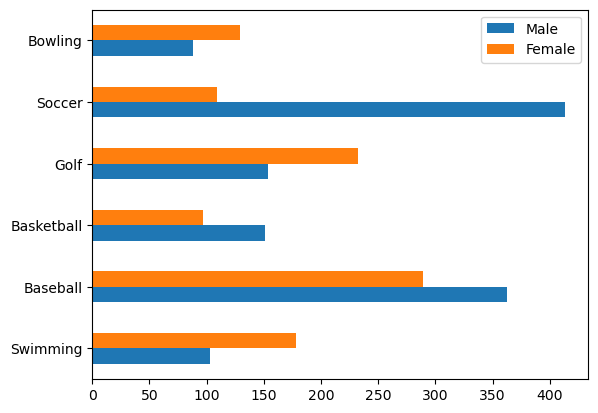

In [7]:
# 막대그래프 가로로 눕히기
df.plot(kind= 'barh') # h = horizontal

<AxesSubplot:>

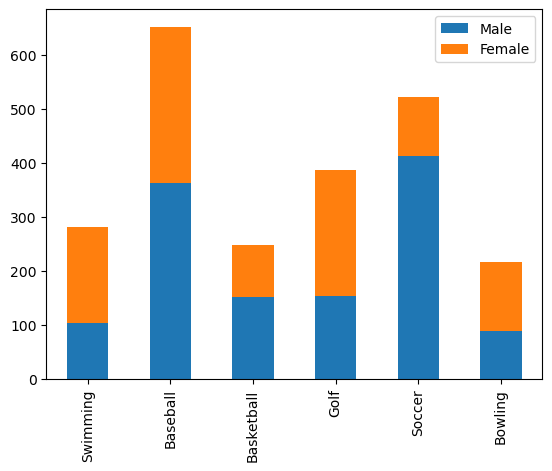

In [8]:
# 위로 쌓기
df.plot(kind="bar", stacked = True)

### 06. [실습]
- 1. gender 칼럼에서 'Male' 값 & 'job' 컬럼에서 'Manager' 조건을 만족하도록 추출 
- 2. race_ethnicity 칼럼에서 'All'값을 뺀 나머지를 사용하도록. 
- 3. 위의 두 조건을 만족할 때, 'race_ethnicity'의 각 값을 'count' 칼럼의 값을 사용하여 그리기 

In [ ]:
# 데이터시각화를 위한 호출
%matplotlib inline
import pandas as pd

# 데이터프레임 불러오기
df = pd.read_csv('data/silicon_valley_summary.csv')

# 1. 관리자 직군 & 남자 
# 'job_category'는 'Managers'이고, 'gender'는 'Male'인 데이터만 뽑음.
boolean_male = df['gender'] == 'Male'
boolean_manager = df['job_category'] == 'Managers'
# (확인용) 두 불린값을 합쳐서 데이터프레임 정리 
# df[boolean_male & boolean_manager]

# 2. 'race_ethnicity'가 'All'인 경우는 제외
boolean_not_all = df['race_ethnicity'] != 'All'
# (1, 2 단계 확인용) 위의 세가지 불린값을 모두 만족하는 것으로 - 데이터프레임 정리
# df[boolean_male & boolean_manager & boolean_not_all]

# 3. plot 메소드로 그래프 그리기
df[boolean_male & boolean_manager & boolean_not_all].plot(kind='bar', x = 'race_ethnicity', y='count') 

### 07. 파이그래프
- 정확한 수치보다 "비율"에 관심 있을 때 (ex. 투표)
- df.plot(kind = 'pie')

<AxesSubplot:ylabel='2017'>

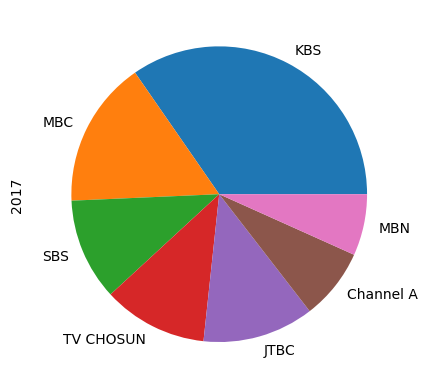

In [14]:
broadcast_df = pd.read_csv('data/broadcast.csv', index_col = 0) # 오류날 때 먼저확인할 것 인덱스 컬럼
broadcast_df.loc[2017].plot(kind='pie')

In [15]:
broadcast_df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


### [실습] 08.

In [ ]:
# 첫 아이디어 (완성 X)

# 인원이 0인 직군 제외
boolean_not_zero = df['count'] != 0
# job에서 total 값 제외 
boolean_not_totals = df['job_category'] != 'totals'
# 확인
df[boolean_not_zero & boolean_not_totals]

df[boolean_not_zero & boolean_not_totals].plot(kind = 'pie', x = 'job_category', y = 'count')

In [ ]:
# 참고 답안 (완성 O)

%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_details.csv')

##
# 기존 df를 손상시키는 drop, set_index는 첫단계에서 지양할것 

# 한단계에 제거할 수 있는건 제거 & 추출할것만 추출하고 시작 -> 불린 값으로 받는게 편리 
# company가 adobe인 경우 추출 & race 구분값 대신 total 값 사용(그래야 직군 컬럼을 중복값 없이 받을 수 있음) & 인원이 0인 직군 제외 
adobe = (df['company'] == 'Adobe') & (df['race'] == 'Overall_totals') & (df['count'] != 0)

# 함정값 제거
# 직군에 'total'로 표시된 경우 -> adobe 와 합치기 위해 불린값으로 받음 
except_total = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')

# adobe 추출 & 함정값 제거해서 합치기 -> 데이터프레임으로 
adobe_job = df[adobe & except_total]

# 파이차트 그리기 전 :  job_category를 인덱스로 지정해야함. => 이름표시를 위함
adobe_job.set_index('job_category', inplace=True)
adobe_job.plot(kind = 'pie', y = 'count')